# Assignment 3
**Due:**  March 19, 10am.


Make a copy of this notebook to  your Bitbucket mp248 repository in the file **Assignment.3/Assignment3.ipynb**.   

**Do your work in a copy of this i-python notebook.**

Do not add any extra files etc. But do add any external module or library files that you may be importing from. 

This notebooks asks you to create visualisations of serveral things. The assignment will be graded by executing your notebook on one of the servers using the MP248 option from the spawner menu. If you have developed your answer notebook elsewhere make sure you test your notebook on one of the course servers, so that you make sure your plots look exactly like you want them on those servers. Notebooks that do not run on the servers can only be partially graded.


## Problem 1

#### The Lorenz equations

One of the most celebrated sets of differential equations in physics is the [Lorenz equations](https://en.wikipedia.org/wiki/Lorenz_system):
$$ \frac{dx}{dt} = \sigma(y-x) $$ $$\frac{dy}{dt} = rx -y -xz$$ $$\frac{dz}{dt} = xy - bz$$ where $\sigma$, $r$ and $b$ are constants. (The names of these constants may seem arbirtrary and odd but are always used in these equations -- _for historical reasons_.

Read about these equations, when and why they were introduced? What special behaviour do they show?

1. Implement an explicit solution to the Lorenz equations. Always use the range from $t = 0$ to $t = 50 $ with the intial condition $(x,y,z) = (1,1,1)$, and consider three cases for $\sigma$, $r$ and $b$ as shown in the code cell below.
2. Using the explicit solution implementation from part 1.1 construct one plot of $x, y$ and $z$ as a function of time for each case for a time step size of $h=0.01$ and $h=0.0001$ for each case (6 plots in total). 
3. Create for the high-resolution cases a 3D line plot for each case using `from mpl_toolkits.mplot3d import Axes3D`.


# 1.1:

In [1]:
t = 0
x = 1.0
y = 1.0
z = 1.0
dt = 0.01

In [2]:
def thedes(x, y, z, case):
    """Solves the differential Lorentz equations given above for the different cases.
    Returns a, a list of the solutions deltax, deltay, and deltaz"""
    if case == 1:
        r = 28.0
        s = 10.0
        b = 8.0 / 3.0
    elif case == 2:
        r = 38.0
        s = 7.0
        b = 7.0 / 3.0
    elif case == 3:
        r = 28.0
        s = 12.0
        b = 2.0 / 3.0
    
    
    deltax = dt*s*(y-x)
    deltay = dt*(r*x-y-x*z)
    deltaz = dt*(x*y-b*z)
    a = (deltax, deltay, deltaz)
    return a


#note the following code completed part 1.1, but it interfered with my code for part 1.2 so I moved it there.

# xlist = [1.0]
# ylist = [1.0]
# zlist = [1.0]
# t = 0
# while t<50:
#     deltax, deltay, deltaz = thedes(x, y, z, 1)
#     x = x + deltax
#     xlist.append(x)
#     y = y + deltay
#     ylist.append(y)
#     z = z + deltaz
#     zlist.append(z)
#     t = t + dt

## 1.2:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


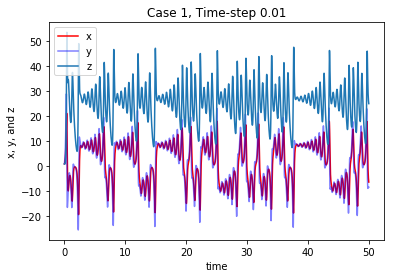

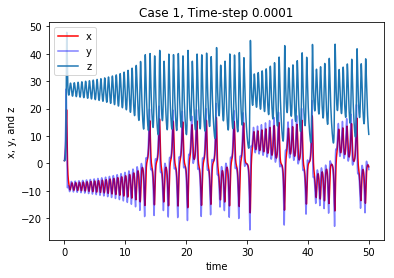

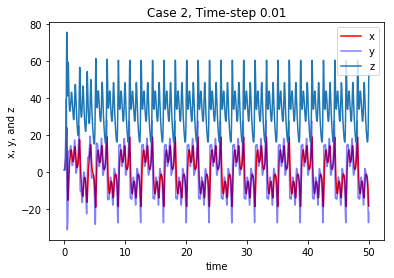

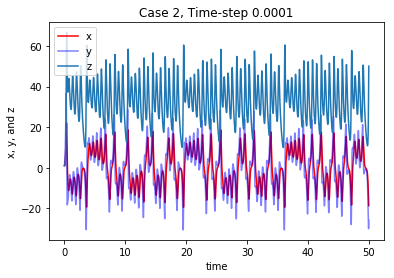

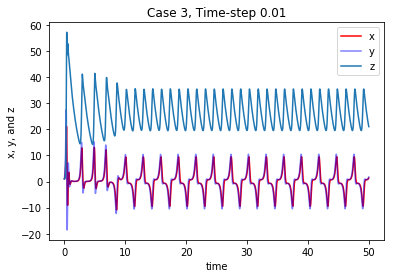

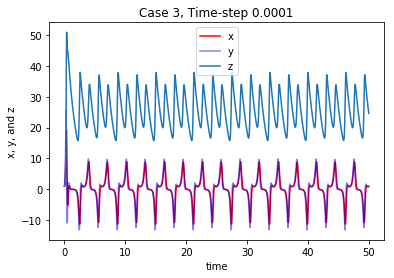

In [4]:
#loops through the different cases and the different time steps (h) using the above thedes function to solve. Plots each case.
cases = [1,2,3]

h = [.01, .0001]
for case in cases:
    for dt in h:
        t = 0
        x = 1.0
        y = 1.0
        z = 1.0
        xlist = [1.0]
        ylist = [1.0]
        zlist = [1.0]
        tlist = [0]
        while t<50:
            deltax, deltay, deltaz = thedes(x, y, z, case)
            x = x + deltax
            xlist.append(x)
            y = y + deltay
            ylist.append(y)
            z = z + deltaz
            zlist.append(z)
            t = t + dt
            tlist.append(t)
        fig = plt.figure()
        plt.plot(tlist,xlist, "r", label = "x")
        plt.plot(tlist,ylist, "b", label = "y", alpha = .5)
        plt.plot(tlist,zlist, label = "z")
        plt.xlabel("time")
        plt.ylabel("x, y, and z")
        plt.title("Case " + str(case) + ", Time-step " + str(dt))
        plt.legend()
        plt.show()

## 1.3:

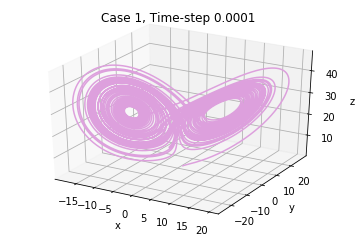

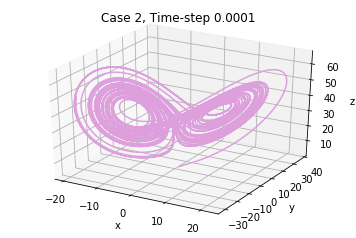

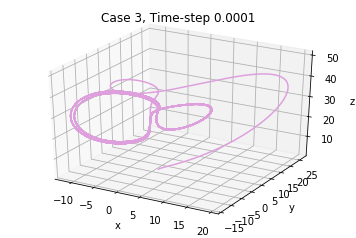

In [5]:
#similar to code above, but creates 3D plots for the "high-resolution" cases, which I took to mean the smaller time step.

cases = [1,2,3]
h = .0001
for case in cases:
    t = 0
    x = 1.0
    y = 1.0
    z = 1.0
    xlist = [1.0]
    ylist = [1.0]
    zlist = [1.0]
    tlist = [0]
    while t<50:
        deltax, deltay, deltaz = thedes(x, y, z, case)
        x = x + deltax
        xlist.append(x)
        y = y + deltay
        ylist.append(y)
        z = z + deltaz
        zlist.append(z)
        t = t + h
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(xlist, ylist, zlist, color = 'plum')
    plt.title("Case " + str(case) + ", Time-step " + str(h))
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    
    plt.show()

Suggestion for further study (not graded): Setup the same solution with `scipy.integrate.odeint`. The solution can be found [Wikipedia's Lorenz system page](https://en.wikipedia.org/wiki/Lorenz_system). Students are encouraged to first try to figure out the solution yourelf. 

## Problem 2
1. Construct a helix in 3D with the circular component in x, y and the stretch component in z direction. In each direction the values span the range $[-1,1]$ and the helix has 5 rotations. Make a plot in 3D using `from mpl_toolkits.mplot3d import Axes3D` with the view `ax.view_init(elev=45, azim=30)`.
2. Perform a shear transformation in the x direction that is proporitional to $1.5y$ of the helix and plot with view `ax.view_init(elev=80, azim=10)`.
3. Perform a rotation around the y-axis by $33\deg$.

## 2.1:

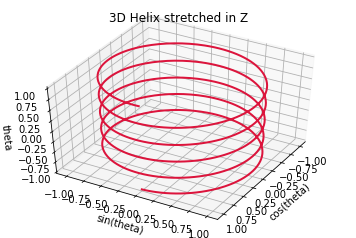

In [6]:
#code adapted from online (https://scipython.com/book/chapter-7-matplotlib/examples/depicting-a-helix/) 
n = 1000
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=45, azim=30)

#creating the x, y, z components of the helix with the stretch component in the z direction
theta_max = 10 * pi
theta = np.linspace(0, theta_max, n)
x = cos(theta)
z = (1/(5*pi))*theta - 1 
y = sin(theta)
ax.plot(x, y, z, color = "crimson", lw=2)

plt.title("3D Helix stretched in Z")
ax.set_xlabel("cos(theta)")
ax.set_ylabel("sin(theta)")
ax.set_zlabel("theta")
plt.show()


## 2.2:

In [7]:
helix = array([x, y, z])
def shear(vector):
    """returns the shear transformation in the x direction proporitional to  1.5y of the given matrix (helix) """
    shear = matrix([[1.0, 1.5, 0], [0., 1., 0], [0., 0., 1.]])
        
    return np.dot(shear, vector).T

In [8]:
shearedmatrix = shear(helix)

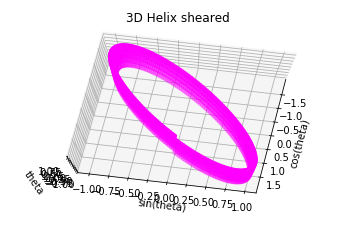

In [9]:
#plotting the shear transformation
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=80, azim=10)
ax.scatter([shearedmatrix[:, 0]], [shearedmatrix[:, 1]], [shearedmatrix[:,2]], color = "magenta", label = 'x-Shear')

plt.title("3D Helix sheared")
ax.set_xlabel("cos(theta)")
ax.set_ylabel("sin(theta)")
ax.set_zlabel("theta")
plt.show()

## 2.3

In [10]:
def rotate(vector):
    """returns the given matrix with the rotation transformation applied to it
    rotated by 33 degrees"""
    deg = 33*pi/180
    rot = matrix([[cos(deg), 0., sin(deg)], [0., 1., 0.], [-sin(deg), 0., cos(deg)]])
        
    return np.dot(rot, vector).T

In [11]:
rotmatrix = rotate(helix)

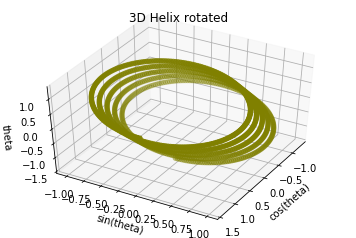

In [12]:
#plots the rotated helix
fig = plt.figure(3)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=45, azim=30)
ax.scatter([rotmatrix[:, 0]], [rotmatrix[:, 1]], [rotmatrix[:,2]], color = "olive", label = 'x-Shear')

plt.title("3D Helix rotated")
ax.set_xlabel("cos(theta)")
ax.set_ylabel("sin(theta)")
ax.set_zlabel("theta")
plt.show()


## Problem 3: 

Given the equations for the voltage difference at each junction point for the circuit of resistors discussed in class (Part.III, unit 3):
* Simplify and sort the set of equations presented in class for the voltages.
* Setup coefficient matrix $A$ and RHS vector $\vec{u}$.
* Use your own Gaussian elimination routine created in the Lab to solve for $\vec{v}$.
* Use an appropriate numpy library to solve the same set of equations. 

In [13]:
import sympy as sp

#all this does is simplifies the voltages, I don't end up using these aside from reading the values off to create the matrix
V1, V2, V3, V4 = sp.symbols('V1 V2 V3 V4')
voltages = [sp.simplify((V3-V4)+(V3-5)+(V3-V1)), sp.simplify((V2-V4)+(V2-0)+(V2-V1)), sp.simplify((V1-V3)+(V1-0)+(V1-V2)+(V1-V4)), sp.simplify((V4-5)+(V4-V3)+(V4-V2)+(V4-V1))]


In [14]:
voltages #read off coefficients from here

[-V1 + 3*V3 - V4 - 5,
 -V1 + 3*V2 - V4,
 4*V1 - V2 - V3 - V4,
 -V1 - V2 - V3 + 4*V4 - 5]

In [15]:
A = matrix([[4.,-1.,-1.,-1.], [-1.,3.,0.,-1.], [-1.0,0.,3.,-1.], [-1.,-1.,-1.,4.]]) #...and put them into a matrix

In [16]:
u = array([0., 0., 5., 5.])

In [17]:
AA = vstack((A.T,u)).T

def gausselim(A, AA):
    """this function carries out the Gaussian elimination routine to solve for v.
    First it row reduces, then back substitutes, and finishes by printing v."""
    i=0
    for i in range(len(AA)): #this is the row reduction
        if AA[i,i] !=0:
            AA[i] = AA[i]/AA[i,i] #make sure the pivot isn't zero (uses the first non-zero entry in each row)
        for j in range(i+1, len(AA)):
            AA[j] = AA[j] - AA[j,i]*AA[i]
    print(AA)   
    
    BB=copy(AA)
    m  = len(A)-1 
    v  = zeros(m+1,float) 
    u  = BB.T[-1] 
    AA = delete(BB,m+1,1) #this set of code sets up the back-substitution and deletes the u vector on the end of the matrix

    for i in range(m, -1, -1): #this is the back substitution; it starts with assigning v4 = 3 and using that to solve the rows above.
        v[i] = u[i]
        g = i
        while g < m:
            v[i] = v[i] - v[g+1]*AA[i, g+1]
            g = g +1

    print("v = ", v)

In [18]:
gausselim(A, AA)

[[ 1.         -0.25       -0.25       -0.25        0.        ]
 [ 0.          1.         -0.09090909 -0.45454545  0.        ]
 [ 0.          0.          1.         -0.5         1.83333333]
 [ 0.          0.          0.          1.          3.        ]]
v =  [ 2.          1.66666667  3.33333333  3.        ]


In [19]:
print("v = ", linalg.solve(A, u)) #I get the same result using numpy's linalg solve function. Sweet!

v =  [ 2.          1.66666667  3.33333333  3.        ]
